In [1]:
import pandas as pd
from tfib.tfibengines import TFIBEngine
from datetime import timedelta

In [2]:
# SETTINGS (TODO)
# dataset path
# train split rateo
# validation split rateo
DATASET_PATH = "data/COVID19_2023_02_22_DATASET.csv"
TRAIN_SPLIT = 0.3
VALID_SPLIT = 0.2
CREDIBILITY_THR = 45.0

## Data load and split

In [3]:
dtype = {'tweet_id': str,
         'user_id': str,
         'retweeted_user_id': str,
         'retweeted_status_id': str,
         "retweeeted_user_id": str}

covid_df = pd.read_csv(DATASET_PATH, parse_dates=[1], dtype=dtype)

In [4]:
covid_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1340325850378592257,1017807360075665408,64.5
1,1340468728534884354,2020-12-20 01:27:04+00:00,924336025387913221,ORIGIN,AUTHOR,95.0
2,1340473042129080320,2020-12-20 01:44:12+00:00,47148805,ORIGIN,AUTHOR,100.0
3,1340474125656190978,2020-12-20 01:48:31+00:00,1022891525242593280,ORIGIN,AUTHOR,5.0
4,1340477947627581440,2020-12-20 02:03:42+00:00,908206586,ORIGIN,AUTHOR,95.0
...,...,...,...,...,...,...
819947,1451536212381011970,2021-10-22 13:09:35+00:00,1329549977463508993,1450461737895989261,4758512368,39.5
819948,1451536215858155528,2021-10-22 13:09:36+00:00,1446561632105205774,1451536139131801605,1446561632105205774,82.5
819949,1451536226876526601,2021-10-22 13:09:39+00:00,712365073,1451310094461947909,1173682089637625856,12.5
819950,1451536327388942348,2021-10-22 13:10:03+00:00,1036611673,1451536158098399236,1260895357548068865,20.0


In [5]:
data_df = covid_df[covid_df.retweeted_user_id != "AUTHOR"].sort_values(by="created_at").reset_index(drop=True)
data_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1340325850378592257,1017807360075665408,64.5
1,1340480189462134784,2020-12-20 02:12:36+00:00,2288557992,1340427316573462530,1063806444380798976,95.0
2,1340481082270085120,2020-12-20 02:16:09+00:00,1237071348662448129,1340427316573462530,1063806444380798976,95.0
3,1340481539709276163,2020-12-20 02:17:58+00:00,475234937,1340481328056332289,122733775,90.0
4,1340489259183206406,2020-12-20 02:48:39+00:00,100878763,1340427316573462530,1063806444380798976,95.0
...,...,...,...,...,...,...
371581,1451535612004216833,2021-10-22 13:07:12+00:00,1430162268,1451523072146743324,605614784,80.0
371582,1451536212381011970,2021-10-22 13:09:35+00:00,1329549977463508993,1450461737895989261,4758512368,39.5
371583,1451536215858155528,2021-10-22 13:09:36+00:00,1446561632105205774,1451536139131801605,1446561632105205774,82.5
371584,1451536226876526601,2021-10-22 13:09:39+00:00,712365073,1451310094461947909,1173682089637625856,12.5


In [6]:
# Splits
cut_index = int(len(data_df)*TRAIN_SPLIT)
train_set_df = data_df.iloc[:cut_index]
test_set_df = data_df.iloc[cut_index:]

In [7]:
train_set_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1340325850378592257,1017807360075665408,64.5
1,1340480189462134784,2020-12-20 02:12:36+00:00,2288557992,1340427316573462530,1063806444380798976,95.0
2,1340481082270085120,2020-12-20 02:16:09+00:00,1237071348662448129,1340427316573462530,1063806444380798976,95.0
3,1340481539709276163,2020-12-20 02:17:58+00:00,475234937,1340481328056332289,122733775,90.0
4,1340489259183206406,2020-12-20 02:48:39+00:00,100878763,1340427316573462530,1063806444380798976,95.0
...,...,...,...,...,...,...
111470,1375867240122351620,2021-03-27 17:48:07+00:00,489331719,1375864236111495169,1683455144,5.0
111471,1375867530712088578,2021-03-27 17:49:16+00:00,1355800060672561153,1375864236111495169,1683455144,5.0
111472,1375867659657617413,2021-03-27 17:49:47+00:00,961833858097332226,1375864236111495169,1683455144,5.0
111473,1375868148491096066,2021-03-27 17:51:43+00:00,3327831430,1375841461963476994,1289758279250452480,82.5


In [8]:
test_set_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
111475,1375868309556580354,2021-03-27 17:52:22+00:00,56653400,1375730908595171330,425902454,95.0
111476,1375868323733340160,2021-03-27 17:52:25+00:00,437884527,1375776494585274369,1343531349706223618,82.5
111477,1375868403827752962,2021-03-27 17:52:44+00:00,2731701196,1375864236111495169,1683455144,5.0
111478,1375868667670433797,2021-03-27 17:53:47+00:00,1076733102951673856,1373204708677017600,92015824,82.5
111479,1375868991311380485,2021-03-27 17:55:04+00:00,1354187480493404165,1375772724560343043,3187239525,95.0
...,...,...,...,...,...,...
371581,1451535612004216833,2021-10-22 13:07:12+00:00,1430162268,1451523072146743324,605614784,80.0
371582,1451536212381011970,2021-10-22 13:09:35+00:00,1329549977463508993,1450461737895989261,4758512368,39.5
371583,1451536215858155528,2021-10-22 13:09:36+00:00,1446561632105205774,1451536139131801605,1446561632105205774,82.5
371584,1451536226876526601,2021-10-22 13:09:39+00:00,712365073,1451310094461947909,1173682089637625856,12.5


In [9]:
# TODO: Save test_set for later evaluation phase in other notebook...

## Hyper-parameters tuning

Tune on a validation set

In [10]:
cut_index = int(len(train_set_df)*(1-VALID_SPLIT))
tuning_set_df = train_set_df.iloc[:cut_index]
valid_set_df = train_set_df.iloc[cut_index:]

In [11]:
tuning_set_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1340325850378592257,1017807360075665408,64.5
1,1340480189462134784,2020-12-20 02:12:36+00:00,2288557992,1340427316573462530,1063806444380798976,95.0
2,1340481082270085120,2020-12-20 02:16:09+00:00,1237071348662448129,1340427316573462530,1063806444380798976,95.0
3,1340481539709276163,2020-12-20 02:17:58+00:00,475234937,1340481328056332289,122733775,90.0
4,1340489259183206406,2020-12-20 02:48:39+00:00,100878763,1340427316573462530,1063806444380798976,95.0
...,...,...,...,...,...,...
89175,1371449911498182657,2021-03-15 13:15:13+00:00,2324171570,1371401065309044736,1322629376421355521,92.5
89176,1371449939214098434,2021-03-15 13:15:20+00:00,881806877146968065,1371411303743520768,903754538838097922,0.0
89177,1371449940577239050,2021-03-15 13:15:20+00:00,1322543941,1371427331894546435,232908749,62.0
89178,1371449947200090112,2021-03-15 13:15:22+00:00,538230890,1371449816719503360,6831142,82.5


In [12]:
valid_set_df

,tweet_id,created_at,user_id,retweeted_status_id,retweeted_user_id,credibility_score
89180,1371450509241028608,2021-03-15 13:17:36+00:00,4640613022,1371389096443133959,133790890,92.5
89181,1371450512516714499,2021-03-15 13:17:37+00:00,1358489644812353536,1371450382501736452,245969509,25.0
89182,1371450595400429568,2021-03-15 13:17:56+00:00,598603007,1371450382501736452,245969509,25.0
89183,1371450813613281285,2021-03-15 13:18:48+00:00,2955233225,1371435633860874246,1173514152737988608,0.0
89184,1371450921838862336,2021-03-15 13:19:14+00:00,1055380681,1371404856527839237,707022920,57.0
...,...,...,...,...,...,...
111470,1375867240122351620,2021-03-27 17:48:07+00:00,489331719,1375864236111495169,1683455144,5.0
111471,1375867530712088578,2021-03-27 17:49:16+00:00,1355800060672561153,1375864236111495169,1683455144,5.0
111472,1375867659657617413,2021-03-27 17:49:47+00:00,961833858097332226,1375864236111495169,1683455144,5.0
111473,1375868148491096066,2021-03-27 17:51:43+00:00,3327831430,1375841461963476994,1289758279250452480,82.5


In [13]:
# Prepare data for hyper-parameter tuning
tuning_set = list(tuning_set_df.itertuples(index=False))
# valid_set = list(valid_set.itertuples(index=False))

In [14]:
# Validation ground truth loading
from tfib.evaluations import get_retweet_network, get_optimal_ranking

validation_retweets_network = get_retweet_network(
    valid_set_df[valid_set_df.credibility_score <= CREDIBILITY_THR],
    rt_UserID_col="retweeted_user_id",
    userID_col="user_id",
    rating_col="credibility_score")

validation_optimal_ranking = get_optimal_ranking(validation_retweets_network).set_index("node")
validation_optimal_ranking

,outgoing_weight,incoming_weight
node,,
1683455144,1399.0,12.0
910827588,758.0,0.0
1032615842,424.0,10.0
4758512368,366.0,0.0
1248216384577953792,357.0,0.0
...,...,...
997782892355969025,0.0,1.0
998220351606796293,0.0,1.0
998943681964068865,0.0,1.0


In [15]:
# Assign a combined single score to the ranking that keeps the order
validation_optimal_ranking['combined'] = (
    validation_optimal_ranking["outgoing_weight"] +
    validation_optimal_ranking["incoming_weight"] / 
    (validation_optimal_ranking["incoming_weight"].max() + 1))

validation_optimal_ranking

,outgoing_weight,incoming_weight,combined
node,,,
1683455144,1399.0,12.0,1399.218182
910827588,758.0,0.0,758.000000
1032615842,424.0,10.0,424.181818
4758512368,366.0,0.0,366.000000
1248216384577953792,357.0,0.0,357.000000
...,...,...,...
997782892355969025,0.0,1.0,0.018182
998220351606796293,0.0,1.0,0.018182
998943681964068865,0.0,1.0,0.018182


In [16]:
# Create the ranking in the dict format
validation_optimal_ranking = validation_optimal_ranking.to_dict()["combined"]
validation_optimal_ranking

{'1683455144': 1399.2181818181818,
 '910827588': 758.0,
 '1032615842': 424.1818181818182,
 '4758512368': 366.0,
 '1248216384577953792': 357.0,
 '221681749': 290.2909090909091,
 '1131151171': 276.0,
 '1333884982268473345': 241.0,
 '1362494222130163715': 169.2,
 '1322629376421355521': 152.0,
 '1620487452': 142.0,
 '1108513736250310657': 119.0,
 '703708224168599552': 107.0,
 '1289758279250452480': 101.0,
 '274093178': 100.0,
 '1063806444380798976': 99.0909090909091,
 '245969509': 95.16363636363636,
 '1258062674782564352': 78.81818181818181,
 '1935534786': 77.0,
 '3426504598': 60.32727272727273,
 '500882938': 45.0,
 '1250029061981831171': 42.07272727272727,
 '337767301': 42.018181818181816,
 '534489041': 40.0,
 '398117986': 35.0,
 '1366520966189355014': 32.0,
 '33284443': 32.0,
 '454365633': 31.01818181818182,
 '1319749433253371907': 30.0,
 '473801195': 30.0,
 '104761548': 29.0,
 '1353069759852474371': 28.181818181818183,
 '1327495041787555841': 28.036363636363635,
 '96576495': 27.41818181

In [17]:
# GRID SEARCH #

from tqdm.auto import tqdm
from tfib.evaluations import ranking_similarity

# Alpha values to explore
alphas = [1, 1/2, 1/4, 1/8, 1/16, 1/32]

# Days (delta) to explore
max_days = (tuning_set_df.created_at.max() - tuning_set_df.created_at.min()).days
#intervals = 6
#interval_delta = max_days // intervals
deltas = list(range(1, max_days, 5))

# Store the results
evaluated = []

# Grid search loop
for a in tqdm(alphas, desc='Varying Alpha'):    
    for d in tqdm(deltas, desc='Varying Days', leave=False):
        
        # Create a new model instance with params
        engine = TFIBEngine(
            reshare_key=lambda x: x[0],
            author_key=lambda x: x[2],
            original_post_key=lambda x: x[3],
            original_author_key=lambda x: x[4],
            timestamp_key=lambda x: x[1],
            flag_key=lambda x: x[5],
            alpha=a,
            delta=timedelta(days=d),
            credibility_threshold = CREDIBILITY_THR,
            enable_repost_count_scaling = False)

        # Fit the model
        engine.time_fit(tuning_set)

        # Get the rank
        ranking = engine.get_rank()
        
        # Ranking evaluation
        nDCG = ranking_similarity(validation_optimal_ranking, ranking)
        
        # Save params configuration
        evaluation = (a, d, nDCG)
        evaluated.append(evaluation)

Varying Alpha:   0%|          | 0/6 [00:00<?, ?it/s]

Varying Days:   0%|          | 0/17 [00:00<?, ?it/s]

Varying Days:   0%|          | 0/17 [00:00<?, ?it/s]

Varying Days:   0%|          | 0/17 [00:00<?, ?it/s]

Varying Days:   0%|          | 0/17 [00:00<?, ?it/s]

Varying Days:   0%|          | 0/17 [00:00<?, ?it/s]

Varying Days:   0%|          | 0/17 [00:00<?, ?it/s]

In [18]:
evaluated

[(1, 1, 0.029971705307343943),
 (1, 6, 0.04899829026086788),
 (1, 11, 0.0679504333056089),
 (1, 16, 0.0682964950967736),
 (1, 21, 0.052111836014512414),
 (1, 26, 0.08495381624969878),
 (1, 31, 0.09182380665760403),
 (1, 36, 0.08181352598219416),
 (1, 41, 0.06541589208980059),
 (1, 46, 0.11658145071310233),
 (1, 51, 0.11879663896565962),
 (1, 56, 0.1078797890623997),
 (1, 61, 0.10107064107319541),
 (1, 66, 0.08906559103273248),
 (1, 71, 0.09713573937738074),
 (1, 76, 0.10194578271306953),
 (1, 81, 0.08717858298174441),
 (0.5, 1, 0.29851156368869547),
 (0.5, 6, 0.47739668493604603),
 (0.5, 11, 0.7215903700375872),
 (0.5, 16, 0.6285004778307958),
 (0.5, 21, 0.4751689648229509),
 (0.5, 26, 0.2549049752872541),
 (0.5, 31, 0.19007150554556018),
 (0.5, 36, 0.19622234692110918),
 (0.5, 41, 0.17931953621562202),
 (0.5, 46, 0.09019826317699153),
 (0.5, 51, 0.09518500324290147),
 (0.5, 56, 0.08717126917735352),
 (0.5, 61, 0.08728388766198014),
 (0.5, 66, 0.08785156821910456),
 (0.5, 71, 0.0847558

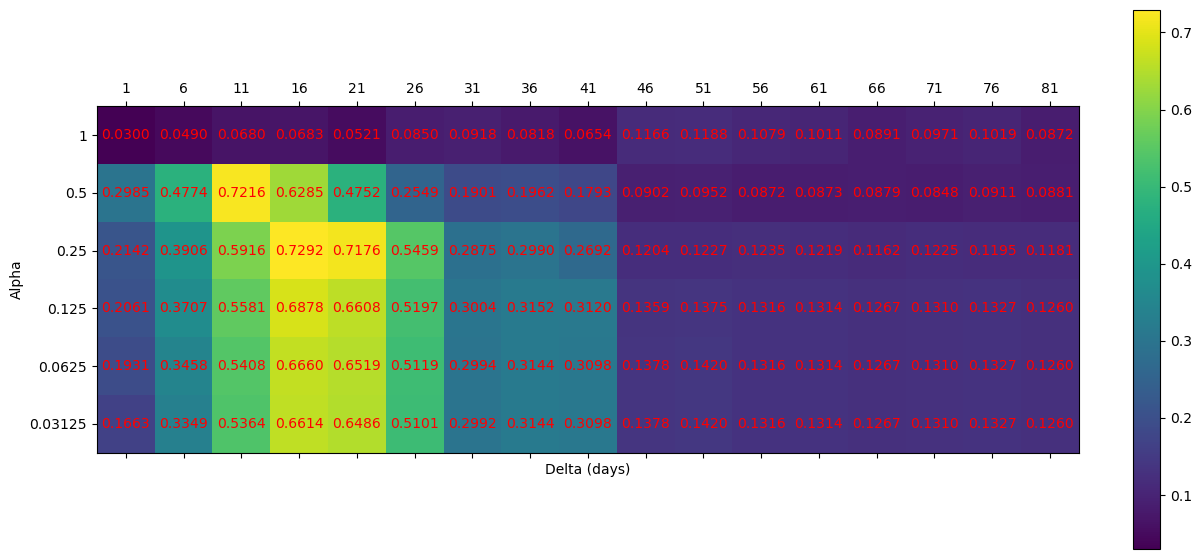

In [19]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt

results = np.array([x[2] for x in evaluated]).reshape(len(alphas), len(deltas))

figure, axes = plt.subplots(figsize=(14,7))
pos = axes.matshow(results, interpolation='nearest')
figure.colorbar(pos, ax=axes, fraction=0.045)

axes.set_xticks(list(range(len(deltas))))
axes.set_yticks(list(range(len(alphas))))
axes.set_xticklabels(deltas)
axes.set_yticklabels(alphas)
axes.set_xlabel('Delta (days)')
axes.set_ylabel('Alpha')

for (i, j), z in np.ndenumerate(results):
    axes.text(j, i, '{:0.4f}'.format(z), ha='center', va='center', color='red')

plt.show()

In [20]:
# Top K vs Bottom K optimal solutions
K = 1
params_rank = sorted(evaluated, key=lambda x: x[2], reverse=True)
top_k = params_rank[:K]
bottom_k = params_rank[-K:]
highlights = top_k + bottom_k
params_rank

[(0.25, 16, 0.7291754040552758),
 (0.5, 11, 0.7215903700375872),
 (0.25, 21, 0.7176323048301001),
 (0.125, 16, 0.68780557505781),
 (0.0625, 16, 0.6660321856360292),
 (0.03125, 16, 0.6614401977805264),
 (0.125, 21, 0.6608038604939694),
 (0.0625, 21, 0.6518673459564917),
 (0.03125, 21, 0.648630348821089),
 (0.5, 16, 0.6285004778307958),
 (0.25, 11, 0.5915624462631779),
 (0.125, 11, 0.5580989701411743),
 (0.25, 26, 0.5458509279865948),
 (0.0625, 11, 0.5407825971568511),
 (0.03125, 11, 0.5363766517570729),
 (0.125, 26, 0.5196995379207494),
 (0.0625, 26, 0.5118705190160892),
 (0.03125, 26, 0.5101293721550293),
 (0.5, 6, 0.47739668493604603),
 (0.5, 21, 0.4751689648229509),
 (0.25, 6, 0.3905734574945565),
 (0.125, 6, 0.3707041863031326),
 (0.0625, 6, 0.34577751050285044),
 (0.03125, 6, 0.33492401067315636),
 (0.125, 36, 0.31519719545398994),
 (0.0625, 36, 0.3143587295588042),
 (0.03125, 36, 0.3143587295588042),
 (0.125, 41, 0.3119926843994003),
 (0.0625, 41, 0.3098497090817033),
 (0.03125, 4

In [21]:
BEST_ALPHA = params_rank[0][0]
BEST_DELTA = params_rank[0][1]

## Training

In [22]:
from tfib.tfibengines import TFIBEngine
from datetime import timedelta

tfib_engine = TFIBEngine(
    reshare_key=lambda x: x[0],
    author_key=lambda x: x[2],
    original_post_key=lambda x: x[3],
    original_author_key=lambda x: x[4],
    timestamp_key=lambda x: x[1],
    flag_key=lambda x: x[5],
    alpha=BEST_ALPHA,
    delta=timedelta(days=BEST_DELTA),
    credibility_threshold = CREDIBILITY_THR,
    enable_repost_count_scaling = False)

tfib_engine.time_fit(list(train_set_df.itertuples(index=False)))

In [23]:
tfib_engine.get_rank()

{'1683455144': 18.386816,
 '4758512368': 7.483252,
 '1248216384577953792': 5.27749,
 '245969509': 4.7345214,
 '1322629376421355521': 4.6859374,
 '1935534786': 4.355957,
 '500882938': 4.346582,
 '1032615842': 4.1424317,
 '1131151171': 3.9104004,
 '1620487452': 3.7460938,
 '1333884982268473345': 3.6265626,
 '1006071437168390144': 3.536621,
 '454365633': 3.2296875,
 '221681749': 2.875,
 '910827588': 2.7806153,
 '726721856749842436': 2.4975586,
 '1258062674782564352': 2.475,
 '398117986': 2.4070313,
 '1176749662155530240': 2.4,
 '104761548': 2.2578125,
 '1366505333523443715': 2.2375,
 '1673695388': 2.1790528,
 '33284443': 2.0660157,
 '250082635': 1.9945313,
 '1285295149082447872': 1.9660156,
 '1032599882765402113': 1.892627,
 '1366520966189355014': 1.8,
 '2182945495': 1.7956054,
 '747184721935933440': 1.773584,
 '775343030421291008': 1.7617676,
 '1289758279250452480': 1.725,
 '48484178': 1.6791503,
 '899952481': 1.6,
 '1250029061981831171': 1.6,
 '1339529183077253120': 1.6,
 '1352629733947

In [24]:
test_retweets_network = get_retweet_network(
    test_set_df[test_set_df.credibility_score <= CREDIBILITY_THR],
    rt_UserID_col="retweeted_user_id",
    userID_col="user_id",
    rating_col="credibility_score")

test_optimal_ranking = get_optimal_ranking(test_retweets_network).set_index("node")
test_optimal_ranking

,outgoing_weight,incoming_weight
node,,
1683455144,22188.0,83.0
4758512368,12982.0,0.0
1248216384577953792,9306.0,13.0
245969509,6510.0,59.0
1032615842,3208.0,276.0
...,...,...
999316852114378752,0.0,1.0
999351943,0.0,1.0
999596295525453824,0.0,1.0


In [25]:
test_optimal_ranking['combined'] = (
    test_optimal_ranking["outgoing_weight"] +
    test_optimal_ranking["incoming_weight"] / 
    (test_optimal_ranking["incoming_weight"].max() + 1))

test_optimal_ranking

,outgoing_weight,incoming_weight,combined
node,,,
1683455144,22188.0,83.0,22188.136066
4758512368,12982.0,0.0,12982.000000
1248216384577953792,9306.0,13.0,9306.021311
245969509,6510.0,59.0,6510.096721
1032615842,3208.0,276.0,3208.452459
...,...,...,...
999316852114378752,0.0,1.0,0.001639
999351943,0.0,1.0,0.001639
999596295525453824,0.0,1.0,0.001639


In [26]:
test_optimal_ranking = test_optimal_ranking.to_dict()["combined"]
test_optimal_ranking

{'1683455144': 22188.13606557377,
 '4758512368': 12982.0,
 '1248216384577953792': 9306.02131147541,
 '245969509': 6510.096721311475,
 '1032615842': 3208.4524590163933,
 '1935534786': 1760.0,
 '454365633': 1759.0131147540983,
 '910827588': 1463.0,
 '1063806444380798976': 1425.216393442623,
 '1241675979929661442': 1412.2016393442623,
 '1322629376421355521': 1391.0032786885247,
 '283416650': 1307.0540983606556,
 '1289758279250452480': 1201.0081967213114,
 '473801195': 1195.0,
 '775343030421291008': 1054.0,
 '1173682089637625856': 1005.0032786885246,
 '1006071437168390144': 991.0,
 '221681749': 751.1065573770492,
 '104761548': 729.0,
 '862970692958138368': 707.5491803278688,
 '500882938': 644.0065573770491,
 '726721856749842436': 632.0409836065573,
 '1050141832758341632': 611.0114754098361,
 '2308107619': 602.0,
 '761787475': 581.0032786885246,
 '33284443': 574.0524590163934,
 '1343955493212065794': 552.0606557377049,
 '849274159': 550.0114754098361,
 '960110310530142208': 543.436065573770

In [27]:
ranking_similarity(test_optimal_ranking, tfib_engine.get_rank())

0.1638625634787656

In [28]:
highlights

[(0.25, 16, 0.7291754040552758), (1, 1, 0.029971705307343943)]

In [29]:
# Hyperparams to show
hparams_pairs = [(a, d) for a, d, _ in highlights]
hparams_pairs

[(0.25, 16), (1, 1)]

In [30]:
# Testing loop
rank_list = []
for alpha, interval in tqdm(hparams_pairs):
    
    # Create a new model instance with params
    model = TFIBEngine(
        reshare_key=lambda x: x[0],
        author_key=lambda x: x[2],
        original_post_key=lambda x: x[3],
        original_author_key=lambda x: x[4],
        timestamp_key=lambda x: x[1],
        flag_key=lambda x: x[5],
        alpha=alpha,
        delta=timedelta(days=interval),
        credibility_threshold = CREDIBILITY_THR,
        enable_repost_count_scaling = False)

    # Fit the model
    model.time_fit(list(train_set_df.itertuples(index=False)))

    # Get the rank and save the running configuration
    rank_list.append((model.get_rank(), alpha, interval))

  0%|          | 0/2 [00:00<?, ?it/s]

In [31]:
from tfib.evaluations import network_dismantle

# Dismantling loop
dismantling_tests = []
for r, a, i in tqdm(rank_list):
    seq = network_dismantle(test_retweets_network, pd.DataFrame.from_dict(r, orient='index'))
    dismantling_tests.append((seq, a, i))

  0%|          | 0/2 [00:00<?, ?it/s]

In [32]:
pd.DataFrame.from_dict(test_optimal_ranking, orient='index')

,0
1683455144,22188.136066
4758512368,12982.000000
1248216384577953792,9306.021311
245969509,6510.096721
1032615842,3208.452459
...,...
999316852114378752,0.001639
999351943,0.001639
999596295525453824,0.001639
999614569537564673,0.001639


In [33]:
def make_lists_same_length(data):
    max_length = max(len(lst) for lst in data.values())
    for key, lst in data.items():
        last_element = lst[-1]
        while len(lst) < max_length:
            lst.append(last_element)

data = {
    "list1": [1, 2, 3],
    "list2": [4, 5],
    "list3": [6, 7, 8, 9]
}

make_lists_same_length(data)
print(data)


{'list1': [1, 2, 3, 3], 'list2': [4, 5, 5, 5], 'list3': [6, 7, 8, 9]}


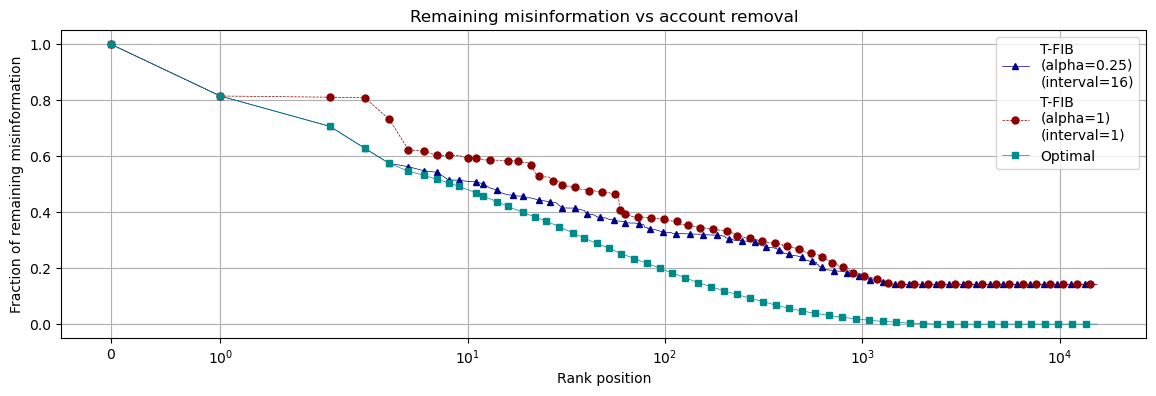

In [34]:
# Build a DataFrame with results
to_df_dict = dict()

for seq, a, i in dismantling_tests:
    to_df_dict[f'T-FIB\n(alpha={a})\n(interval={i})'] = [y for _, y in seq]
    
# Add the optimal rank dismantle sequence    
to_df_dict['Optimal'] = [y for _, y in network_dismantle(test_retweets_network, pd.DataFrame.from_dict(test_optimal_ranking, orient='index'))]

make_lists_same_length(to_df_dict)

# Convert to dataframe
dismantle_df = pd.DataFrame(to_df_dict)

# Set up the plot
colors = ['darkblue', 'darkred', 'darkcyan']#'darkgreen', 'darkmagenta', 'darkcyan']
styles = ['^-', 'o--', 's-' , '*-', '+-']
ax = dismantle_df.plot.line(logx='sym',
                            figsize=(14, 4),
                            grid=True,
                            color=colors,
                            style=styles,
                            linewidth=0.5,
                            markevery=0.012,
                            ms=5,
                            title='Remaining misinformation vs account removal')

ax.set_ylabel("Fraction of remaining misinformation")

ax.set_xlabel("Rank position");

In [ ]:
# NOTE: This result has been obtained with phi = 0.2 (deviation weight)

## Save ranking